# Diseño Filtros FIR pasa bajas con el método de ventanas

## 1. Ventana Cuadrada

In [30]:
#NOTE importar bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from scipy import signal

from numpy.lib.stride_tricks import sliding_window_view as slide_w

## Diseño del filtro
El diseño está basado en la frecuencia normalizada 0-0.5
$$h[n] =  b[n] = \dfrac{sin(2\pi f_t n)}{\pi n}$$
$$f_t = \dfrac{f_c}{sr}$$

Implementación
$$  
b[n] = 
     \begin{cases}
        \dfrac{sin\left(2\pi f_t(n - \lceil\frac{N}{2}\rceil)\right)}{\pi (n - \lceil\frac{N}{2}\rceil)} & n\neq\lceil\dfrac{N}{2}\rceil\\
       2f_t & n = \lceil\dfrac{N}{2}\rceil\\
     \end{cases}
$$

N: orden del filtro

M: numero de muestras, N + 1

### Definición de funciones

In [8]:
def firdesign(N, fc, sr, ftype='low', info=False):
    ft = fc/sr
    M  = N + 1 
    tk = np.arange(M) - M//2
    #
    tk[M//2] = -1
    #
    sinc      = np.sin(2*np.pi * ft*tk)/(np.pi*tk)
    sinc[M//2] = 2*ft
    tk[M//2]   = 0
    #
    if info:
        print(tk, M)
        plt.plot(ft*tk, sinc, '-o', markersize=9, linewidth=3)
        plt.grid(True)
        #
        plt.show()
    return sinc

In [9]:
def freq_hz(S,sr):
    w, h = signal.freqz(S)
    H    = 20*np.log10( np.abs(h) )
    W    = np.angle  (h)
    W    = np.unwrap (W)
    W    = np.degrees(W)
    w    = np.linspace(0,sr/2,H.shape[0] )
    #
    return w, W, H

### Inicialización de parámetros
Orden N, Longitud M, Frecuencia de corte fc, y Frecuencia de muestreo sr

In [39]:
N  = 100
M  = N+1
fc = 52
sr = 220

### Calcular coeficientes del filtro

[-50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33
 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15
 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50] 101


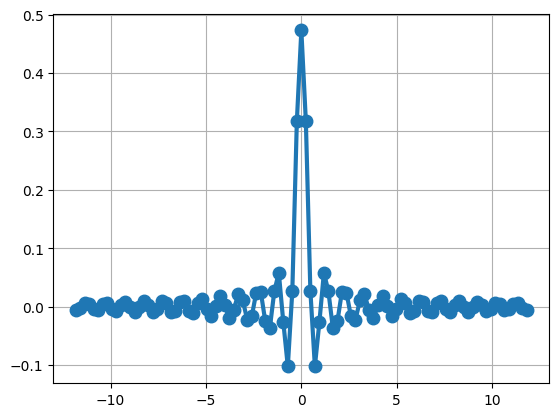

[-0.0057909  -0.00319436  0.00547408  0.00428711 -0.00496239 -0.00534583
  0.00425222  0.00633917 -0.00334393 -0.00723467  0.00224196  0.00799923
 -0.00095486 -0.00859946 -0.00050478  0.009002    0.00212048 -0.00917366
 -0.00387214  0.00908141  0.00573638 -0.00869208 -0.0076869   0.0079716
  0.00969501 -0.00688365 -0.01173016  0.00538733  0.01376049 -0.00343315
 -0.0157535   0.00095642  0.01767667  0.00213439 -0.01949812 -0.00597855
  0.02118725  0.01080346 -0.02271536 -0.0170089   0.02405626  0.02536335
 -0.02518677 -0.03753655  0.02608724  0.05790897 -0.02674196 -0.10261747
  0.02713945  0.31714224  0.47272727  0.31714224  0.02713945 -0.10261747
 -0.02674196  0.05790897  0.02608724 -0.03753655 -0.02518677  0.02536335
  0.02405626 -0.0170089  -0.02271536  0.01080346  0.02118725 -0.00597855
 -0.01949812  0.00213439  0.01767667  0.00095642 -0.0157535  -0.00343315
  0.01376049  0.00538733 -0.01173016 -0.00688365  0.00969501  0.0079716
 -0.0076869  -0.00869208  0.00573638  0.00908141 -0.0

In [40]:
c_fir = firdesign(N,fc,sr, info=True)
print(c_fir)

### Respuesta en frecuencia del filtro

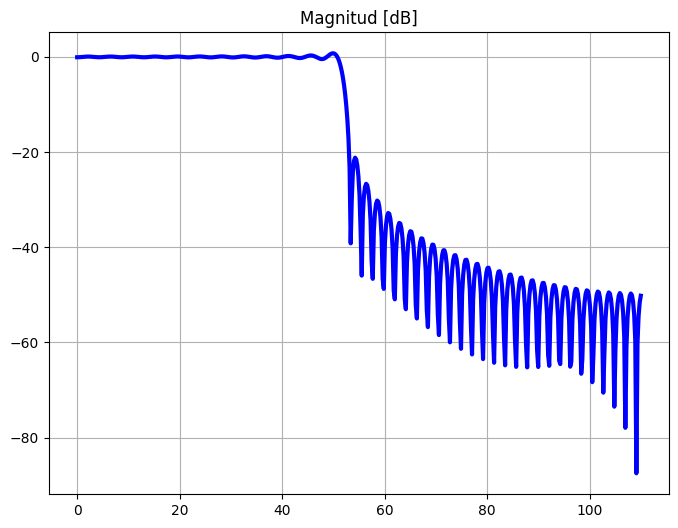

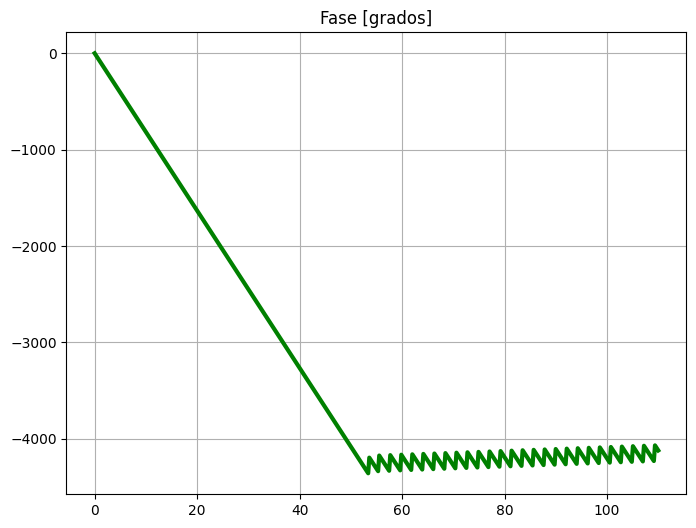

In [41]:
w,w_hz,h_hz = freq_hz(c_fir,sr)

plt.figure( figsize=(8,6) )
plt.title('Magnitud [dB]')
plt.grid(True)
plt.plot( w,h_hz,'b',linewidth=3 )

plt.figure( figsize=(8,6) )
plt.title('Fase [grados]')
plt.plot( w,w_hz,'g',linewidth=3 )
plt.grid(True)
plt.show()

**ejemplo**

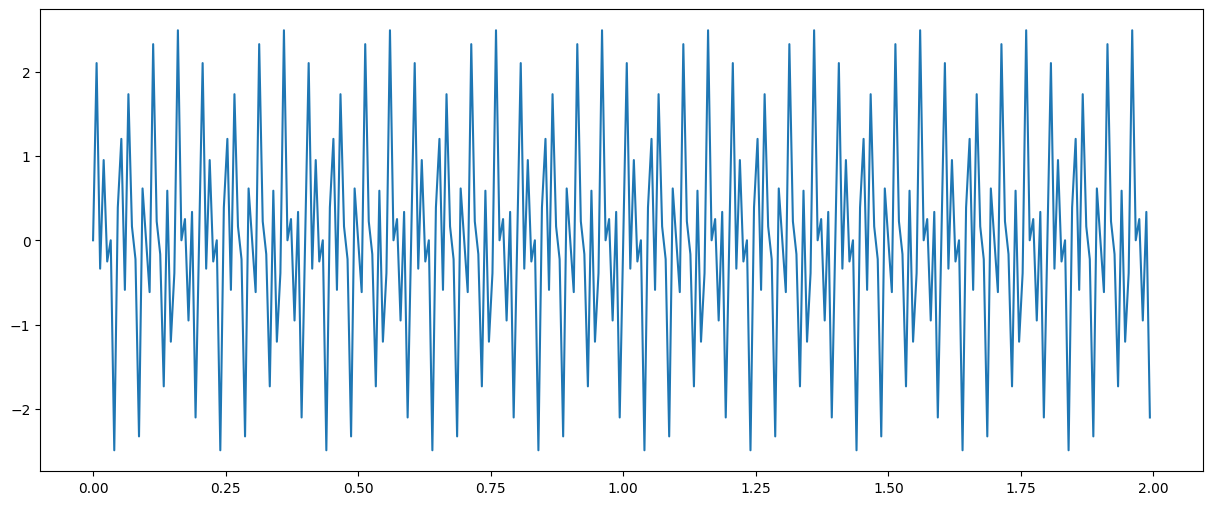

In [10]:
sr = 150
L  = 2
#
t = np.arange(sr*L)/sr
y = np.sin(2*np.pi*20*t) + np.sin(2*np.pi*45*t) + np.sin(2*np.pi*65*t)
#
plt.figure(figsize=(15, 6))
plt.plot(t, y)

[-25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8
  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10
  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25] 51


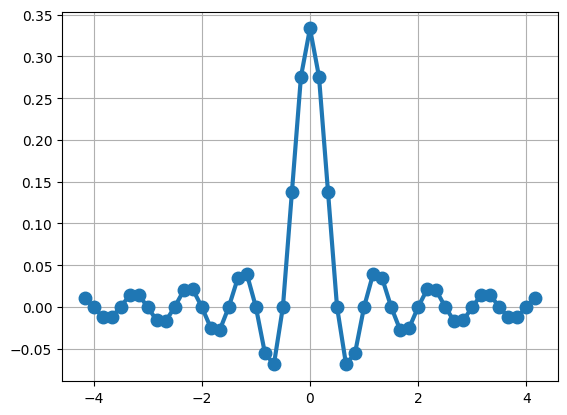

In [17]:
N  = 50
fc = 25
bn = firdesign(N, fc, sr, info=True)

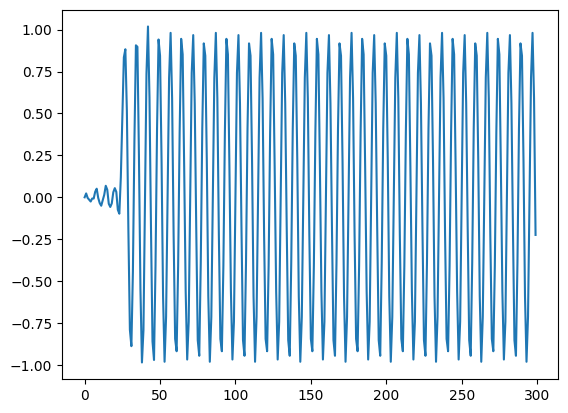

In [18]:
plt.plot(signal.lfilter(bn, [1], y))

In [32]:
slide_w(y, bn.shape[0]).shape

(250, 51)

In [38]:
as_strided = np.lib.stride_tricks.as_strided
a = np.arange(1,15)
b = as_strided(a, (11,4), a.strides*2)
b
completar con ceros

array([[ 1,  2,  3,  4],
       [ 2,  3,  4,  5],
       [ 3,  4,  5,  6],
       [ 4,  5,  6,  7],
       [ 5,  6,  7,  8],
       [ 6,  7,  8,  9],
       [ 7,  8,  9, 10],
       [ 8,  9, 10, 11],
       [ 9, 10, 11, 12],
       [10, 11, 12, 13],
       [11, 12, 13, 14]])

## 2. Ventana de Hamming

$$W[t_k]= 0.54 - 0.46 cos\left(\dfrac{2\pi t_k}{M}\right)$$

In [2]:
tk   = np.arange(M)
print 2*np.pi*tk/float(M)
hamm = .54 - .46*np.cos( 2*np.pi*tk/float(M) )
print hamm

plt.figure(figsize=(8,6))
plt.plot(c_fir,'-bo',linewidth=3,markersize=8)
plt.plot(hamm ,'-ro',linewidth=3,markersize=8)
plt.grid(True)
plt.show()


SyntaxError: invalid syntax (1463469750.py, line 2)

[ -4.63271771e-04  -2.58390911e-04   4.57391500e-04   3.77213227e-04
  -4.67301042e-04  -5.45670573e-04   4.74861723e-04   7.79278143e-04
  -4.54109089e-04  -1.08690258e-03   3.72562404e-04   1.46838449e-03
  -1.93199297e-04  -1.91257864e-03  -1.23018539e-04   2.39595324e-03
   6.14229760e-04  -2.88183769e-03  -1.31456553e-03   3.32033950e-03
   2.25106999e-03  -3.64886482e-03  -3.44087670e-03   3.79306940e-03
   4.88885943e-03  -3.66792794e-03  -6.58594984e-03   3.17841518e-03
   8.50827409e-03  -2.21898629e-03  -1.06172078e-02   6.70504313e-04
   1.28603873e-02   1.60780280e-03  -1.51736505e-02  -4.79608196e-03
   1.74838137e-02   9.15151263e-03  -1.97121340e-02  -1.50906081e-02
   2.17782528e-02   2.33844620e-02  -2.36043812e-02  -3.56909891e-02
   2.51194678e-02   5.63648727e-02  -2.62630829e-02  -1.01502954e-01
   2.69887717e-02   3.16507543e-01   4.72622086e-01   3.17071672e-01
   2.70851357e-02  -1.02047736e-01  -2.64515202e-02   5.68719742e-02
   2.53916454e-02  -3.61440361e-02

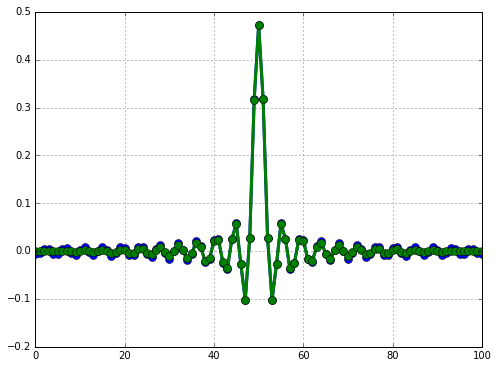

In [47]:
W_fir = c_fir*hamm

print W_fir

plt.figure(figsize=(8,6))
plt.plot(c_fir,'-bo',linewidth=3,markersize=8)
plt.plot(W_fir,'-go',linewidth=3,markersize=8)
plt.grid(True)
plt.show()


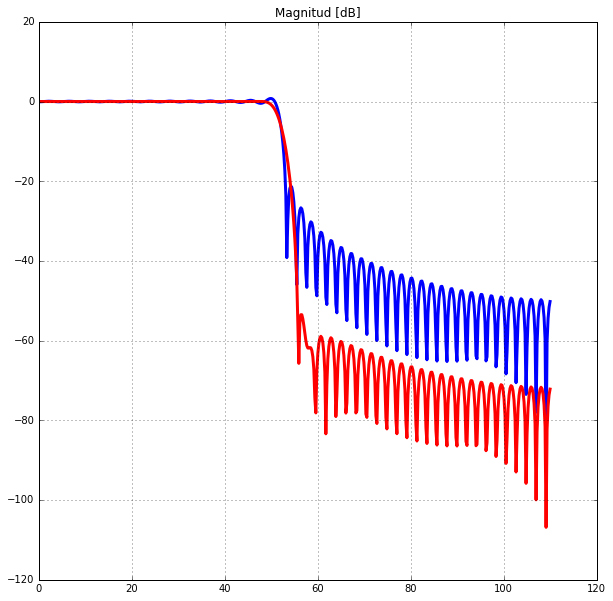

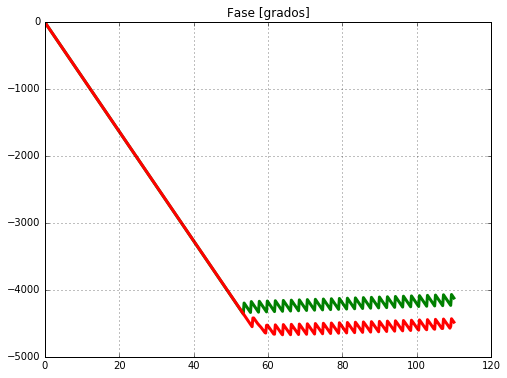

In [48]:
w ,w_hz ,h_hz  = freq_hz(c_fir,sr)
wW,w_hzW,h_hzW = freq_hz(W_fir,sr)


plt.figure( figsize=(10,10) )
plt.title('Magnitud [dB]')
plt.grid(True)
plt.plot( w ,h_hz ,'b',linewidth=3 )
plt.plot( wW,h_hzW,'r',linewidth=3 )

plt.figure( figsize=(8,6) )
plt.title('Fase [grados]')
plt.plot( w ,w_hz ,'g',linewidth=3 )
plt.plot( wW,w_hzW,'r',linewidth=3 )
plt.grid(True)
plt.show()

